# Time Series Forecasting with Python (ARIMA, LSTM, Prophet)

In [63]:
import numpy as np
import pandas as pd
import os
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
#from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

In this article we will try to forecast a time series data basically. We'll build three different model with Python and inspect their results. Models we will use are ARIMA (Autoregressive Integrated Moving Average), LSTM (Long Short Term Memory Neural Network) and Facebook Prophet. Let's jump in and start with ARIMA.

## ARIMA (Autoregressive Integrated Moving Average)

ARIMA is a model which is used for predicting future trends on a time series data. It is model that form of regression analysis. 
* **AR (Autoregression) :** Model that shows a changing variable that regresses on its own lagged/prior values.
* **I (Integrated) :**  Differencing of raw observations to allow for the time series to become stationary
* **MA (Moving average) :** Dependency between an observation and a residual error from a moving average model

For ARIMA models, a standard notation would be ARIMA with p, d, and q, where integer values substitute for the parameters to indicate the type of ARIMA model used.

* **p:** the number of lag observations in the model; also known as the lag order.
* **d:** the number of times that the raw observations are differenced; also known as the degree of differencing.
* **q:** the size of the moving average window; also known as the order of the moving average.

For more information about ARIMA you can check:
<br>
[What is ARIMA](https://www.quora.com/What-is-ARIMA)
<br>
[Autoregressive Integrated Moving Average (ARIMA)](https://www.investopedia.com/terms/a/autoregressive-integrated-moving-average-arima.asp)

## LSTM Neural Network

> LSTM stands for long short term memory. It is a model or architecture that extends the memory of recurrent neural networks. Typically, recurrent neural networks have ‘short term memory’ in that they use persistent previous information to be used in the current neural network. Essentially, the previous information is used in the present task. That means we do not have a list of all of the previous information available for the neural node.
> LSTM introduces long-term memory into recurrent neural networks. It mitigates the vanishing gradient problem, which is where the neural network stops learning because the updates to the various weights within a given neural network become smaller and smaller. It does this by using a series of ‘gates’. These are contained in memory blocks which are connected through layers, like this:

![](https://hub.packtpub.com/wp-content/uploads/2018/04/LSTM-696x494.png)

> LSTM work
There are three types of gates within a unit:
Input Gate: Scales input to cell (write)
Output Gate: Scales output to cell (read)
Forget Gate: Scales old cell value (reset)
Each gate is like a switch that controls the read/write, thus incorporating the long-term memory function into the model.

For more detail:
<br>
[What is LSTM?](https://hub.packtpub.com/what-is-lstm/)
<br>
[What is LSTM? - Quora](https://www.quora.com/What-is-LSTM)
<br>
[Wikipedia](https://en.wikipedia.org/wiki/Long_short-term_memory)

## Prophet

> Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

[Facebook's Prophet Web Page](https://facebook.github.io/prophet/)<br>
[Forecasting at Scale](https://peerj.com/preprints/3190.pdf)


# FORECAST

## Read Dataset

In [64]:
dateparse = lambda x: pd.to_datetime(x, format='%Y%m', errors = 'coerce')
df = pd.read_csv("natural_gas_emission.csv", parse_dates=['YYYYMM'], index_col='YYYYMM', date_parser=dateparse) 
ts = df[pd.Series(pd.to_datetime(df.index, errors='coerce')).notnull().values]
ts.head(15)
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 584 entries, 1973-01-01 to 2021-08-01
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    584 non-null    int64  
 1   MSN           584 non-null    object 
 2   Value         584 non-null    float64
 3   Column_Order  584 non-null    int64  
 4   Description   584 non-null    object 
 5   Unit          584 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 31.9+ KB


In [65]:
ts.drop(['Unnamed: 0','MSN','Column_Order','Unit','Description'], axis = 1, inplace = True)

In [66]:
ts.info()
df=ts

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 584 entries, 1973-01-01 to 2021-08-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   584 non-null    float64
dtypes: float64(1)
memory usage: 9.1 KB


In [67]:
df.head(15)

,Value
YYYYMM,
1973-01-01,12.163
1973-02-01,11.696
1973-03-01,13.979
1973-04-01,14.612
1973-05-01,17.326
1973-06-01,20.244
1973-07-01,23.043
1973-08-01,22.827
1973-09-01,19.278


In [68]:
df.index.freq = 'MS'

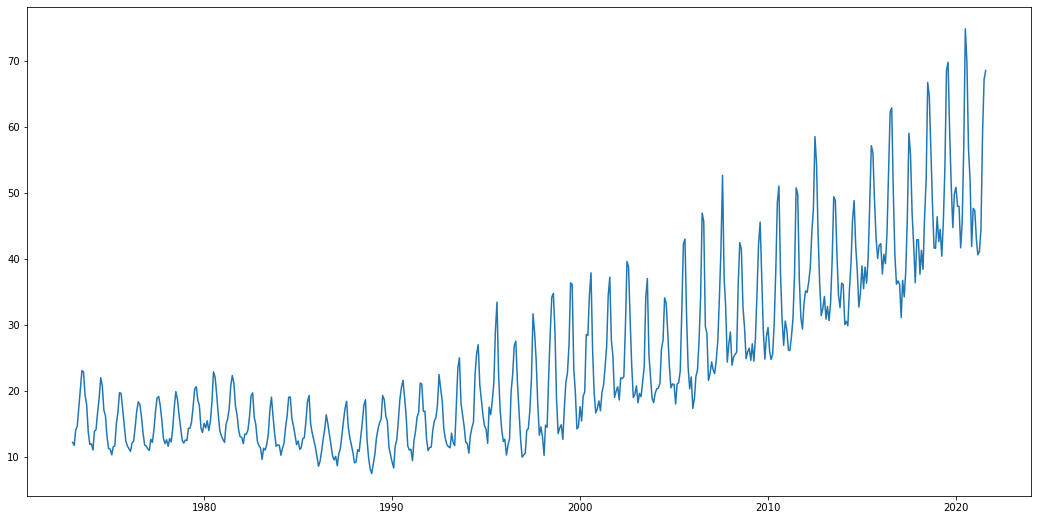

In [69]:
plt.figure(figsize=(18,9))
plt.plot(df.index, df["Value"], linestyle="-")
plt.xlabel=('Dates')
plt.ylabel=('Emission Value')
plt.show();

When we look at plot we can sey there is a seasonality in data. That's why we will use SARIMA (Seasonal ARIMA) instead of ARIMA.

> Seasonal ARIMA, is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component.
> It adds three new hyperparameters to specify the autoregression (AR), differencing (I) and moving average (MA) for the seasonal component of the series, as well as an additional parameter for the period of the seasonality.

> There are four seasonal elements that are not part of ARIMA that must be configured; they are:<br>
**P:** Seasonal autoregressive order.<br>
**D:** Seasonal difference order.<br>
**Q:** Seasonal moving average order.<br>
**m:** The number of time steps for a single seasonal period.<br>

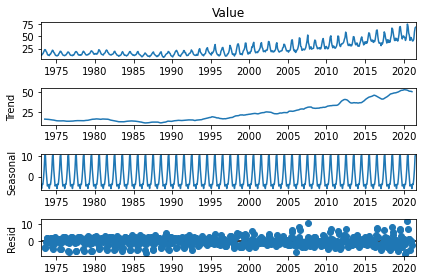

In [70]:
a = seasonal_decompose(df["Value"], model = "add")
a.plot();

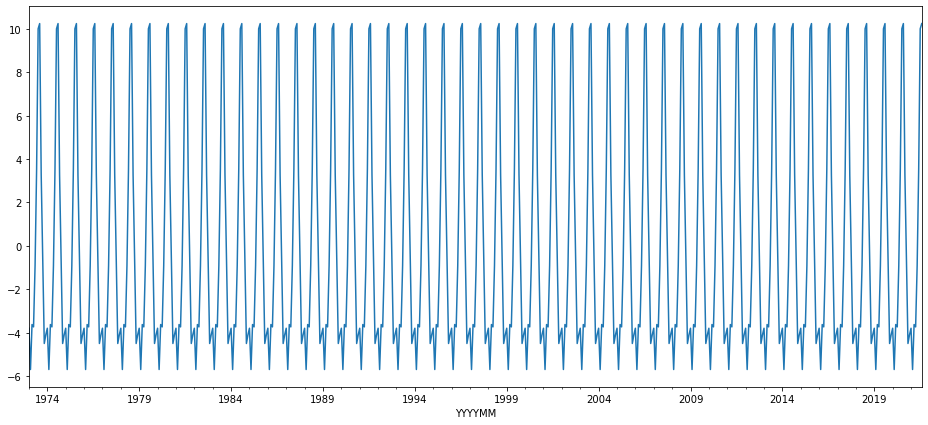

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))
a.seasonal.plot();

## ARIMA Forecast

Let's run auto_arima() function to get best p,d,q,P,D,Q values

In [72]:
#auto_arima(df['Monthly beer production'], seasonal=True, m=12,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4).summary()

As we can see best arima model chosen by auto_arima() is SARIMAX(2, 1, 1)x(4, 0, 3, 12)

**For some reason "pmdarima" wasn't installed at Kaggle. Thats's why I couldn't use "auto_arima()" here. But you can see same output below where "arima_model" defined.**

Let's split the data into train and test set

In [73]:
train_data = df[:len(df)-12]
test_data = df[len(df)-12:]

In [74]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2020-09-01 to 2021-08-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   12 non-null     float64
dtypes: float64(1)
memory usage: 192.0 bytes


In [75]:
arima_model = SARIMAX(train_data['Value'], order = (2,1,1), seasonal_order = (4,0,3,12))
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                                      Value   No. Observations:                  572
Model:             SARIMAX(2, 1, 1)x(4, 0, [1, 2, 3], 12)   Log Likelihood               -1170.835
Date:                                    Tue, 14 Dec 2021   AIC                           2363.669
Time:                                            07:20:13   BIC                           2411.491
Sample:                                        01-01-1973   HQIC                          2382.326
                                             - 08-01-2020                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6842      0.038     17.887      0.000       0.609       0.759
ar.L2          0.0153      0.037      0.416      0.677      -0.057       0.087
ma.L1         -0.9699      0.014    -67.407      0.000      -0.998      -0.942
ar.S.L12       0.5561      0.284      1.957      0.050      -0.001       1.113
ar.S.L24      -0.2937      0.358     -0.821      0.412      -0.995       0.407
ar.S.L36       0.6424      0.277      2.318      0.020       0.099       1.186
ar.S.L48       0.0784      0.058      1.356      0.175      -0.035       0.192
ma.S.L12      -0.2626      0.281     -0.935      0.350      -0.813       0.288
ma.S.L24       0.3917      0.304      1.289      0.197      -0.204       0.987
ma.S.L36      -0.4360      0.214     -2.041      0.041      -0.855      -0.017
sigma2         3.3469      0.147     22.845      0.000       3.060       3.634
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               178.32
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               8.61   Skew:                             0.54
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [76]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

2020-09-01    59.583993
2020-10-01    52.078776
2020-11-01    46.515924
2020-12-01    49.264631
2021-01-01    50.311869
2021-02-01    46.278783
2021-03-01    48.316498
2021-04-01    44.679865
2021-05-01    49.321799
2021-06-01    57.708058
2021-07-01    71.404415
2021-08-01    69.610451
Freq: MS, Name: ARIMA Predictions, dtype: float64

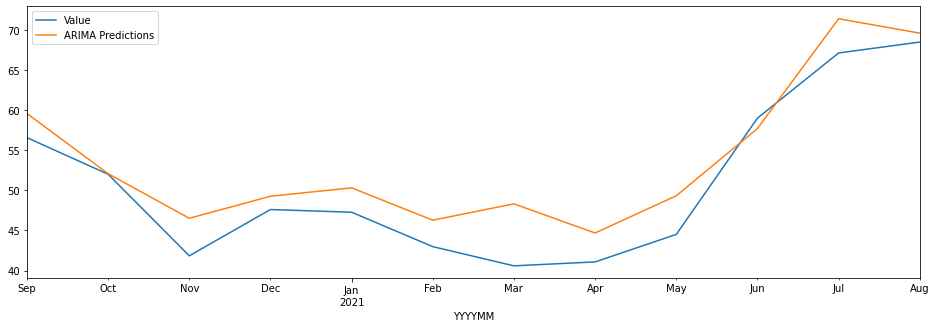

In [77]:
test_data['Value'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [78]:
test_data['ARIMA_Predictions'] = arima_pred

In [79]:
from sklearn.metrics import mean_absolute_error
arima_rmse_error = rmse(test_data['Value'], arima_pred)
arima_mse_error = arima_rmse_error**2
arima_mae = mean_absolute_error(test_data['Value'], test_data["ARIMA_Predictions"])
arima_mape = (np.mean(np.abs(test_data['Value']-test_data["ARIMA_Predictions"])/test_data['Value'])*100)
print(f'MAE: {arima_mae}')
print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}')
print(f"MAPE : {arima_mape}" )

MAE: 3.21574544575069
MSE Error: 14.25137473456897
RMSE Error: 3.7750993012858576
MAPE : 6.922135856763964


## LSTM Forecast

First we'll scale our train and test data with MinMaxScaler

In [80]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [81]:
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

Before creating LSTM model we should create a Time Series Generator object.

In [82]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

In [83]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 200)               161600    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [84]:
lstm_model.fit_generator(generator,epochs=20)

Epoch 1/20
560/560 [==============================] - 3s 3ms/step - loss: 0.0228
Epoch 2/20
560/560 [==============================] - 2s 3ms/step - loss: 0.0100
Epoch 3/20
560/560 [==============================] - 2s 3ms/step - loss: 0.0073
Epoch 4/20
560/560 [==============================] - 2s 3ms/step - loss: 0.0032
Epoch 5/20
560/560 [==============================] - 2s 3ms/step - loss: 0.0029
Epoch 6/20
560/560 [==============================] - 2s 3ms/step - loss: 0.0021
Epoch 7/20
560/560 [==============================] - 2s 3ms/step - loss: 0.0027
Epoch 8/20
560/560 [==============================] - 2s 3ms/step - loss: 0.0022
Epoch 9/20
560/560 [==============================] - 2s 3ms/step - loss: 0.0024
Epoch 10/20
560/560 [==============================] - 2s 4ms/step - loss: 0.0028
Epoch 11/20
560/560 [==============================] - 2s 3ms/step - loss: 0.0022
Epoch 12/20
560/560 [==============================] - 2s 3ms/step - loss: 0.0020
Epoch 13/20
560/560 [====

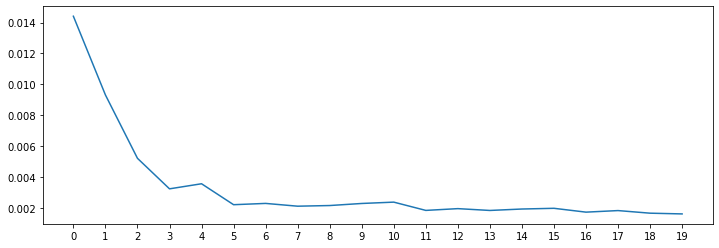

In [85]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [86]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

As you know we scaled our data that's why we have to inverse it to see true predictions.

In [87]:
lstm_predictions_scaled

[array([0.8205218], dtype=float32),
 array([0.7186675], dtype=float32),
 array([0.6543768], dtype=float32),
 array([0.6706117], dtype=float32),
 array([0.69198185], dtype=float32),
 array([0.68307346], dtype=float32),
 array([0.65591747], dtype=float32),
 array([0.619833], dtype=float32),
 array([0.6666873], dtype=float32),
 array([0.82147175], dtype=float32),
 array([1.0294563], dtype=float32),
 array([1.0671444], dtype=float32)]

In [88]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)

In [89]:
lstm_predictions

array([[62.72529543],
       [55.86266063],
       [51.53094598],
       [52.62480313],
       [54.06466125],
       [53.46444059],
       [51.63475109],
       [49.20348754],
       [52.36039087],
       [62.78930215],
       [76.80267428],
       [79.34198783]])

In [90]:
test_data['LSTM_Predictions'] = lstm_predictions

In [91]:
test_data

,Value,ARIMA_Predictions,LSTM_Predictions
YYYYMM,,,
2020-09-01,56.571,59.583993,62.725295
2020-10-01,52.012,52.078776,55.862661
2020-11-01,41.835,46.515924,51.530946
2020-12-01,47.609,49.264631,52.624803
2021-01-01,47.271,50.311869,54.064661
2021-02-01,42.979,46.278783,53.464441
2021-03-01,40.583,48.316498,51.634751
2021-04-01,41.075,44.679865,49.203488
2021-05-01,44.504,49.321799,52.360391


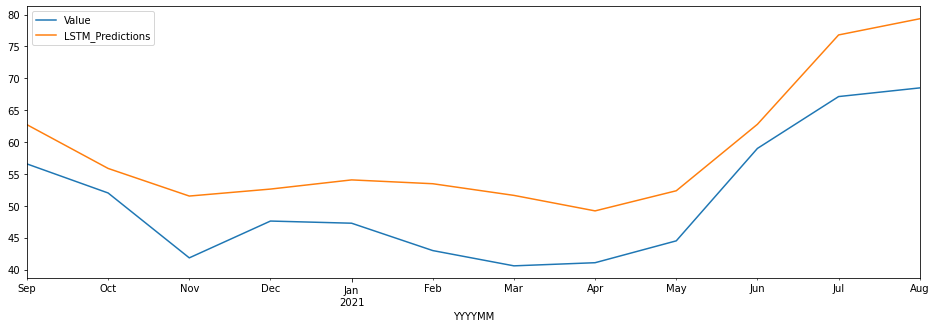

In [92]:
test_data['Value'].plot(figsize = (16,5), legend=True)
test_data['LSTM_Predictions'].plot(legend = True);

In [93]:
lstm_rmse_error = rmse(test_data['Value'], test_data["LSTM_Predictions"])
lstm_mse_error = lstm_rmse_error**2
lstm_mae = mean_absolute_error(test_data['Value'], test_data["LSTM_Predictions"])
lstm_mape = (np.mean(np.abs(test_data['Value']-test_data["LSTM_Predictions"])/test_data['Value'])*100)
print(f'MAE: {lstm_mae}')
print(f'MSE Error: {lstm_mse_error}\nRMSE Error: {lstm_rmse_error}')
print(f"MAPE : {lstm_mape}" )

MAE: 7.777783396273847
MSE Error: 66.94487937099214
RMSE Error: 8.181985050768068
MAPE : 16.00763936490417


## Prophet Forecast

In [94]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 584 entries, 1973-01-01 to 2021-08-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   584 non-null    float64
dtypes: float64(1)
memory usage: 9.1 KB


In [95]:
pip install pystan

Note: you may need to restart the kernel to use updated packages.


In [96]:
pip install fbprophet

Note: you may need to restart the kernel to use updated packages.


In [97]:
df_pr = df.copy()
df_pr = df.reset_index()

In [98]:
df_pr.columns = ['ds','y'] # To use prophet column names should be like that

In [99]:
train_data_pr = df_pr.iloc[:len(df)-12]
test_data_pr = df_pr.iloc[len(df)-12:]

In [100]:
#!conda install -c conda-forge fbprophet -y

In [101]:
#!pip install --upgrade plotly

In [102]:
#pip install fbprophet

In [103]:
from fbprophet import Prophet

In [104]:
test_data_pr

,ds,y
572,2020-09-01,56.571
573,2020-10-01,52.012
574,2020-11-01,41.835
575,2020-12-01,47.609
576,2021-01-01,47.271
577,2021-02-01,42.979
578,2021-03-01,40.583
579,2021-04-01,41.075
580,2021-05-01,44.504
581,2021-06-01,59.001


In [105]:
test_data_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 572 to 583
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      12 non-null     datetime64[ns]
 1   y       12 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 324.0 bytes


In [106]:
m = Prophet()

In [107]:
#!conda install pystan=2.19.0.0
#!conda install -c conda-forge fbprophet=0.6.0

In [108]:
m.fit(train_data_pr)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [109]:
future = m.make_future_dataframe(periods=12,freq='MS')
prophet_pred = m.predict(future)

In [110]:
prophet_pred.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
579,2021-04-01,53.150036,45.193609,53.189623,53.143173,53.159273,-3.949675,-3.949675,-3.949675,-3.949675,-3.949675,-3.949675,0.0,0.0,0.0,49.200361
580,2021-05-01,53.299448,48.249393,56.122100,53.288531,53.313342,-1.074238,-1.074238,-1.074238,-1.074238,-1.074238,-1.074238,0.0,0.0,0.0,52.225210
581,2021-06-01,53.453840,52.566456,60.673364,53.439806,53.472601,3.346477,3.346477,3.346477,3.346477,3.346477,3.346477,0.0,0.0,0.0,56.800318
582,2021-07-01,53.603252,59.517511,67.433668,53.584145,53.626894,9.766564,9.766564,9.766564,9.766564,9.766564,9.766564,0.0,0.0,0.0,63.369816
583,2021-08-01,53.757645,59.475946,67.475695,53.732657,53.787725,9.743184,9.743184,9.743184,9.743184,9.743184,9.743184,0.0,0.0,0.0,63.500828


In [111]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-12:]['ds'], "Pred" : prophet_pred[-12:]["yhat"]})

In [112]:
prophet_pred = prophet_pred.set_index("Date")

In [113]:
prophet_pred.index.freq = "MS"

In [114]:
prophet_pred

,Pred
Date,
2020-09-01,55.096543
2020-10-01,51.199365
2020-11-01,48.183356
2020-12-01,48.310586
2021-01-01,48.225562
2021-02-01,46.452070
2021-03-01,49.300009
2021-04-01,49.200361
2021-05-01,52.225210


In [115]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values

In [116]:
import seaborn as sns

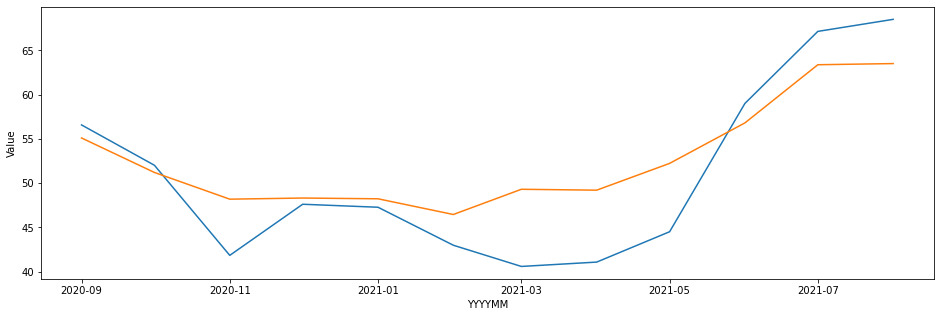

In [117]:
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["Value"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [118]:
prophet_rmse_error = rmse(test_data['Value'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = df['Value'].mean()
from sklearn.metrics import mean_absolute_error
prophet_mae = mean_absolute_error(test_data['Value'], test_data["Prophet_Predictions"])
prophet_mape = (np.mean(np.abs(test_data['Value']-test_data["Prophet_Predictions"])/test_data['Value'])*100)
print(f'MAE: {prophet_mae}')
print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}')
print(f"MAPE: {prophet_mape}" )

MAE: 4.107523728623316
MSE Error: 25.183780349223333
RMSE Error: 5.018344383282532
MAPE: 8.846700427513671


In [124]:
%store errors

Stored 'errors' (DataFrame)


In [119]:
rmse_errors = [arima_rmse_error, lstm_rmse_error, prophet_rmse_error]
mse_errors = [arima_mse_error, lstm_mse_error, prophet_mse_error]
mae = [arima_mae,lstm_mae,prophet_mae]
mape = [arima_mape,lstm_mape,prophet_mape]
errors = pd.DataFrame({"Models" : ["ARIMA", "LSTM", "Prophet"],"RMSE Errors" : rmse_errors, "MSE Errors" : mse_errors, "MAPE" : mape, "MAE" : mae })

In [127]:
p=  prophet_pred['Pred'].values 
%store p

Stored 'p' (ndarray)


In [128]:
p

array([55.09654302, 51.19936512, 48.18335615, 48.31058588, 48.22556248,
       46.45207002, 49.30000903, 49.20036106, 52.22521027, 56.80031781,
       63.36981591, 63.50082829])

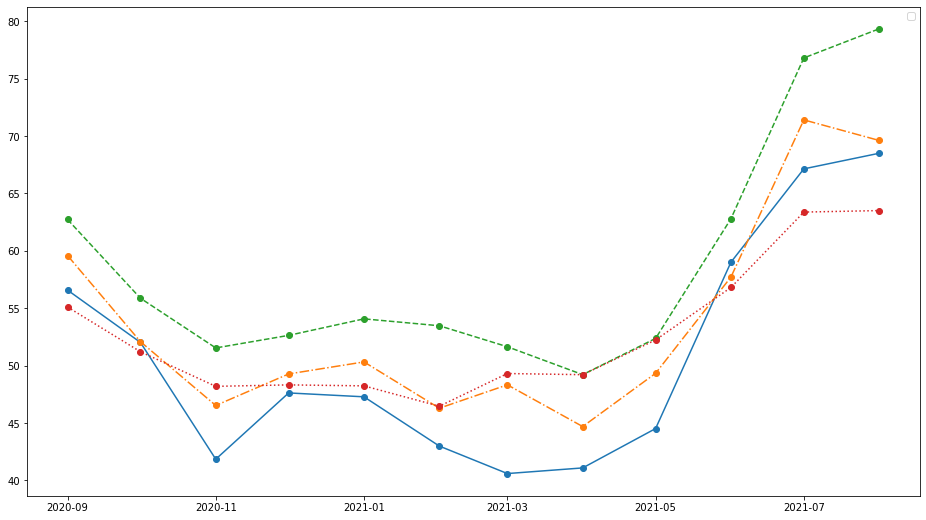

In [121]:
plt.figure(figsize=(16,9))
plt.plot_date(test_data.index, test_data["Value"], linestyle="-")
plt.plot_date(test_data.index, test_data["ARIMA_Predictions"], linestyle="-.")
plt.plot_date(test_data.index, test_data["LSTM_Predictions"], linestyle="--")
plt.plot_date(test_data.index, test_data["Prophet_Predictions"], linestyle=":")
plt.legend()
plt.show()

In [122]:
print(f"Mean: {test_data['Value'].mean()}")
errors

Mean: 50.756


,Models,RMSE Errors,MSE Errors,MAPE,MAE
0,ARIMA,3.775099,14.251375,6.922136,3.215745
1,LSTM,8.181985,66.944879,16.007639,7.777783
2,Prophet,5.018344,25.183780,8.846700,4.107524


In [123]:
test_data

,Value,ARIMA_Predictions,LSTM_Predictions,Prophet_Predictions
YYYYMM,,,,
2020-09-01,56.571,59.583993,62.725295,55.096543
2020-10-01,52.012,52.078776,55.862661,51.199365
2020-11-01,41.835,46.515924,51.530946,48.183356
2020-12-01,47.609,49.264631,52.624803,48.310586
2021-01-01,47.271,50.311869,54.064661,48.225562
2021-02-01,42.979,46.278783,53.464441,46.452070
2021-03-01,40.583,48.316498,51.634751,49.300009
2021-04-01,41.075,44.679865,49.203488,49.200361
2021-05-01,44.504,49.321799,52.360391,52.225210
